# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

arquivo = r'C:\Users\grego\Documents\GitHub\Cientistadedados-EBAC\Módulo 06 - Descritiva I\Sinasc.csv'
df = pd.read_csv(arquivo, sep = ',')
df = pd.DataFrame(df)

In [76]:
print(df)

       ORIGEM   CODESTAB  CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  \
0           1  2679477.0      110001        1        19        5.0   
1           1  2679477.0      110001        1        29        2.0   
2           1  2679477.0      110001        1        37        9.0   
3           1  2516500.0      110001        1        30        5.0   
4           1  2516500.0      110001        1        30        2.0   
...       ...        ...         ...      ...       ...        ...   
27023       1  2604388.0      510340        1        32        2.0   
27024       1  2752654.0      510675        1        19        1.0   
27025       1  9659366.0      510787        1        24        2.0   
27026       1  9659366.0      510787        1        21        2.0   
27027       1  2795655.0      510792        1        18        5.0   

                ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  ...  KOTELCHUCK  \
0          8 a 11 anos         NaN         0.0         0.0  ...           5   
1

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [78]:
categorias_apgar5 = pd.cut(df['APGAR5'], bins=[0, 3, 5, 7, 10], labels=['asfixia severa', 'asfixia moderada', 'asfixia leve', 'normal'])
qtd_apgar5 = categorias_apgar5.value_counts()
print(qtd_apgar5)

APGAR5
normal              26463
asfixia leve          320
asfixia moderada       68
asfixia severa         57
Name: count, dtype: int64


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

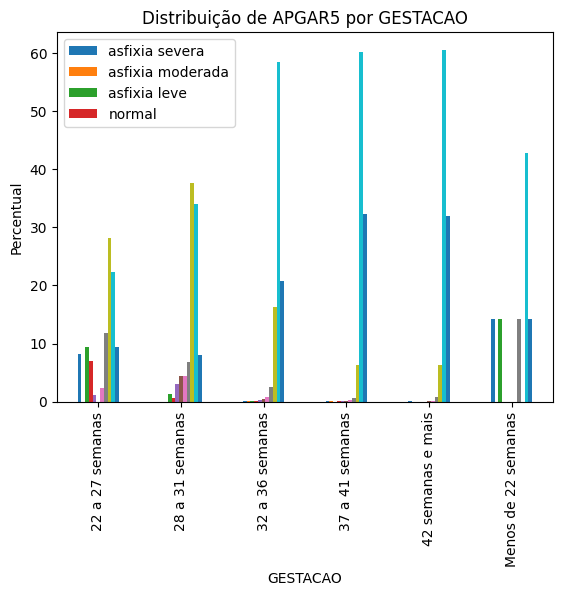

In [79]:
percentuais_linha.plot(kind='bar')

# Configurando o título e os rótulos dos eixos
plt.title('Distribuição de APGAR5 por GESTACAO')
plt.xlabel('GESTACAO')
plt.ylabel('Percentual')

# Configurando as legendas
categorias_apgar5 = ['asfixia severa', 'asfixia moderada', 'asfixia leve', 'normal']
plt.legend(labels=categorias_apgar5)

# Exibindo o gráfico
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [80]:
tabela_cruzada = pd.crosstab(df['GESTACAO'], df['APGAR5'])
print(tabela_cruzada)

APGAR5               0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
GESTACAO                                                                    
22 a 27 semanas         7     0     8     6     1     0     2    10    24   
28 a 31 semanas         0     0     2     1     5     7     7    11    61   
32 a 36 semanas         2     2     2     2     8    11    17    56   362   
37 a 41 semanas         5    20     3     5     7    21    45   151  1417   
42 semanas e mais       1     0     0     0     0     1     1     5    44   
Menos de 22 semanas     1     0     1     0     0     0     0     1     0   

APGAR5                9.0   10.0  
GESTACAO                          
22 a 27 semanas         19     8  
28 a 31 semanas         55    13  
32 a 36 semanas       1307   465  
37 a 41 semanas      13565  7284  
42 semanas e mais      423   223  
Menos de 22 semanas      3     1  


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [81]:
percentuais_linha = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

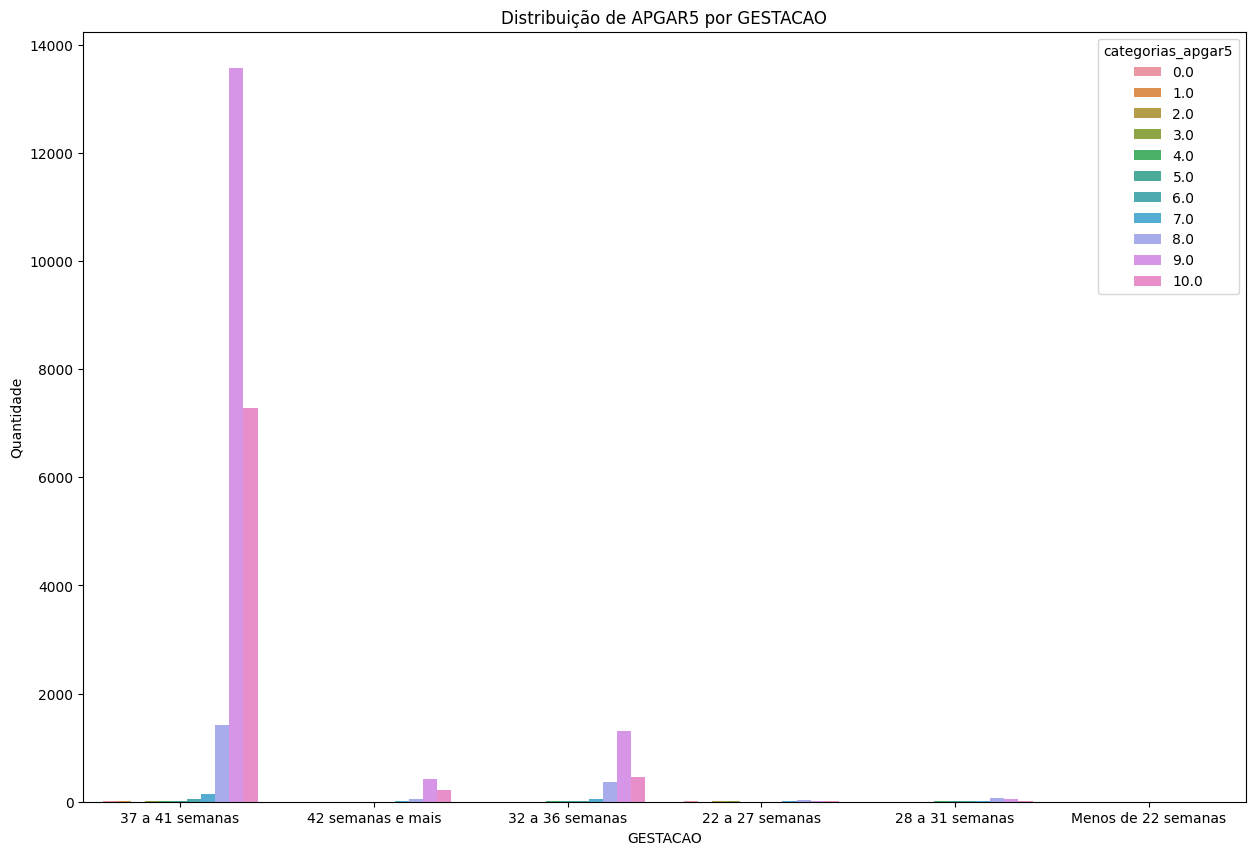

In [84]:
plt.figure(figsize=(15, 10))  # Definindo o tamanho da figura

# Criando o gráfico de barras com Seaborn
sns.countplot(data=df, x='GESTACAO', hue='APGAR5')

# Configurando o título e os rótulos dos eixos
plt.title('Distribuição de APGAR5 por GESTACAO')
plt.xlabel('GESTACAO')
plt.ylabel('Quantidade')

# Configurando as legendas
plt.legend(title='categorias_apgar5')

# Exibindo o gráfico
plt.show()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

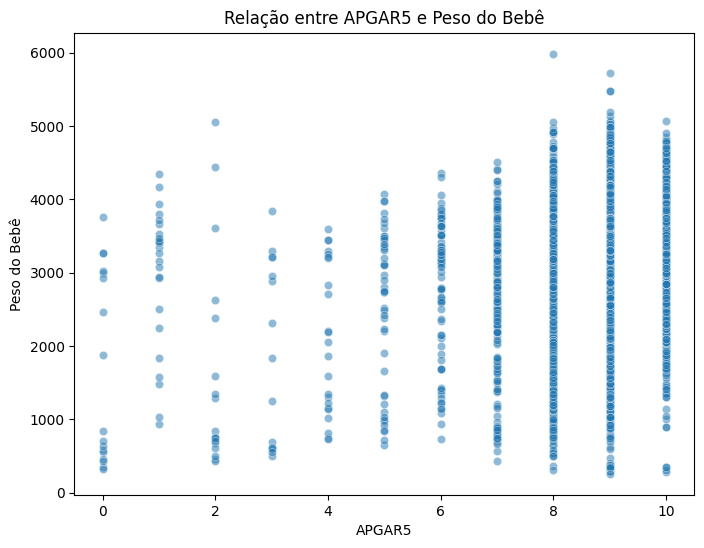

In [83]:
import seaborn as sns

plt.figure(figsize=(8, 6))  

# Definindo o tamanho da figura

# Criando o scatter plot com Seaborn
sns.scatterplot(data=df, x='APGAR5', y='PESO', alpha=0.5)

# Configurando o título e os rótulos dos eixos
plt.title('Relação entre APGAR5 e Peso do Bebê')
plt.xlabel('APGAR5')
plt.ylabel('Peso do Bebê')

# Exibindo o gráfico
plt.show()